In [1]:
import pandas as pd #for tabulated data
import numpy as np #speedy operations on tables

import matplotlib.pyplot as plt #plots
import seaborn as sns #nicer plots
#some fancy plots stuff:
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
#from matplotlib.patches import Patch 
import matplotlib.patches as mpatches
import matplotlib.cm as cm

#dealing with dates and time
import datetime
import matplotlib.dates as dates

import re #regular expressions

#loading data from google sheets
import gspread
from oauth2client.service_account import ServiceAccountCredentials

import sys
#from df2gspread import df2gspread as d2g
import scipy.stats as stats

from ipywidgets import interact


import plotly.express as px

In [14]:
activities_colours = {
    'sleep': '#636975',
    'High_intensity_work': '#5a85c4',
    'Low_intensity_work': '#8cbae6',
    'Human_function': '#FDB462',
    'Procrastination': '#fff41c',
    'Culture': '#9467BD',
    'Socialising': '#dec3dd',
    'Quality': '#d18ccf',
    'Travel': '#bdbdbd',
    'Idle': '#fffbad',
    'HI_exercise': '#82c431',
    'LI_exercise': '#cce879',
    'WI-uni': '#bae8ff',
    'WI-self-improvement': '#6fc3e3',
    'WI-organisation': '#007FB5',
    'WI-admin': '#035372',
    'WI-German': '#071014',
    'WL-uni': '#bae8ff',
    'WL-self-improvement': '#6fc3e3',
    'WL-organisation': '#007FB5',
    'WL-admin': '#035372',
    'WL-German': '#071014',
    'Culture-books': '#D1C4E9',
    'Culture-films': '#B39DDB',
    'Culture-documentaries': '#9575CD',
    'Culture-TV': '#673AB7',
    'Culture-other': '#311B92',
    'Quality-blogs': '#FFD56D',
    'Quality-podcasts': '#FFB582',
    'Quality-news': '#FF8FBD',
    'Quality-games': '#D18CCF',
    'Quality-YT': '#988ADD',
    'Quality-chill': '#338ADE',
    'Quality-other': '#0080A6'
}

activities_labels = {
    'sleep': 'sleeping',
    'High_intensity_work': 'focused work',
    'Low_intensity_work': 'low-focus work',
    'Human_function': 'human function',
    'Procrastination': 'procrastinating',
    'Culture': 'culture',
    'Socialising': 'socialising',
    'Quality': 'other quality time',
    'Travel': 'travelling',
    'Idle': 'idle',
    'HI_exercise': 'exercising',
    'LI_exercise': 'exercising (lower intensity)', 
    'WI-uni': 'uni & PhD',
    'WI-self-improvement': 'self-improvement',
    'WI-organisation': 'organising things',
    'WI-admin': 'admin',
    'WI-German': 'German',
    'WL-uni': 'uni & PhD',
    'WL-self-improvement': 'self-improvement',
    'WL-organisation': 'organising things',
    'WL-admin': 'admin',
    'WL-German': 'German',
    'Culture-books': 'books',
    'Culture-films': 'films',
    'Culture-documentaries': 'documentaries',
    'Culture-TV': 'TV shows',
    'Culture-other': 'other',
    'Quality-blogs': 'blogs',
    'Quality-podcasts': 'podcasts',
    'Quality-news': 'news',
    'Quality-games': 'games',
    'Quality-YT': 'YouTube',
    'Quality-chill': 'chilling',
    'Quality-other': 'other'
}

activities_shortcuts= {
    'S': 'sleep',
    'WI': 'High_intensity_work',
    'WL': 'Low_intensity_work',
    'H': 'Human_function',
    'P': 'Procrastination',
    'C': 'Culture',
    'Ch': 'Socialising',
    'Q': 'Quality',
    'T': 'Travel',
    'I': 'Idle',
    'ExI': 'HI_exercise',
    'ExL': 'LI_exercise', 
    'WI-u': 'WI-uni',
    'WI-i': 'WI-self-improvement',
    'WI-o': 'WI-organisation',
    'WI-a': 'WI-admin',
    'WI-ger': 'WI-German',
    'WL-u': 'WL-uni',
    'WL-i': 'WL-self-improvement',
    'WL-o': 'WL-organisation',
    'WL-a': 'WL-admin',
    'WL-ger': 'WL-German',
    'C-b': 'Culture-books',
    'C-f': 'Culture-films',
    'C-d': 'Culture-documentaries',
    'C-tv': 'Culture-TV',
    'Q-bl': 'Quality-blogs',
    'Q-p': 'Quality-podcasts',
    'Q-n': 'Quality-news',
    'Q-g': 'Quality-games',
    'Q-yt': 'Quality-YT',
    'Q-ch': 'Quality-chill',
}

subcategories = {'High_intensity_work': ('WI-uni', 'WI-self-improvement', 'WI-organisation', 'WI-admin', 'WI-German'),
                'Low_intensity_work': ('WL-uni', 'WL-self-improvement', 'WL-organisation', 'WL-admin', 'WL-German'),
                'Culture': ('Culture-books', 'Culture-films', 'Culture-documentaries', 'Culture-TV', 'Culture-other'),
                'Quality': ('Quality-blogs', 'Quality-podcasts', 'Quality-news', 'Quality-games', 'Quality-YT', 'Quality-chill', 'Quality-other')
}

subcategories_short = {'High_intensity_work': [r'.*WI-u.*', r'.*WI-i.*', r'.*WI-o.*', r'.*WI-a.*', r'.*WI-ger.*'],
                'Low_intensity_work': [r'.*WL-u.*', r'.*WL-i.*', r'.*WL-o.*', r'.*WL-a.*', r'.*WL-ger.*'],
                'Culture': [r'.*C-b.*', r'.*C-f.*', r'.*C-d.*', r'.*C-tv.*'],
                'Quality': [r'.*Q-bl.*', r'.*Q-p.*', r'.*Q-n.*', r'Q-g.*', r'Q-yt.*',  r'Q-ch.*']
}

In [15]:
months = ['January', 'February', 'March', 
          'April', 'May', 'June',
         'July', 'August', 'September', 
          'October', 'November', 'December']
months_abb = ['Jan', 'Feb', 'Mar', 
             'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 
             'Oct', 'Nov', 'Dec']

weekdays_abb = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

font_small = 14
font_med = 18
font_big = 20
font_title = 22

plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_big)     # fontsize of the axes title
plt.rc('axes', labelsize=font_big)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_med)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_med)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_big)    # legend fontsize
plt.rc('figure', titlesize=font_title)  # fontsize of the figure title

## Data Loading and Cleaning

### Data from the 2020 spreadsheet on github

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/szalapak/life-data/main/2020.csv')

Converting date column into datetime

In [4]:
data['date'] = pd.to_datetime(data['date'], format = '%d/%m/%y')
data['date'] = data['date'].dt.date

data['day'] = pd.DatetimeIndex(data['date']).day
data['month'] = pd.DatetimeIndex(data['date']).month
data['weekday'] = pd.DatetimeIndex(data['date']).weekday

for name in ['morning', 'afternoon', 'evening']:
    data[name] = pd.to_numeric(data[name])
    
data = data.set_index(data['date'])

In [5]:
data.head()

,date,location,morning,afternoon,evening,alcohol?,0:00,0:15,0:30,0:45,...,22:30,22:45,23:00,23:15,23:30,23:45,notes,day,month,weekday
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2020-01-01,"PL, Waw",NaN,NaN,NaN,lots,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,...,T_Fam_2,P-sm,P-sm,P-sm,P-sm,P-sm,NaN,1,1,2
2020-01-02,2020-01-02,"PL, Pos",NaN,NaN,NaN,no,P-sm,S,S,S,...,C-b,C-b,C-b,C-b,C-b,Ch-e_Fr_1,NaN,2,1,3
2020-01-03,2020-01-03,"PL, Pos",NaN,NaN,NaN,no,Ch_Fr_1,Ch_Fr_1,WL-a,S,...,WL-o,WL-o,WL-o,P-sm,P-sm,C,NaN,3,1,4
2020-01-04,2020-01-04,"PL, Pos",NaN,NaN,NaN,no,P-sm,S,S,S,...,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,Filip visiting,4,1,5
2020-01-05,2020-01-05,"PL, Krk",NaN,NaN,NaN,no,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,S,...,C-f_Fr_1,C-f_Fr_1,Ch_Fr_1,Ch_Fr_1,Ch_Fr_1,Ch_Fr_1,Filip visiting,5,1,6


Sectioning data table to get just the activities:

In [6]:
cols = list(data.columns)

start = cols.index("0:00")
end = cols.index("23:45")

act_ind = cols[start:end+1]

activities = data[act_ind]

activities = activities.set_index(data['date'])
activities.columns = pd.to_datetime(activities.columns, format = '%H:%M').time

activities.head()

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,Ch_Fr_3,...,T,T_Fam_2,T_Fam_2,T_Fam_2,T_Fam_2,P-sm,P-sm,P-sm,P-sm,P-sm
2020-01-02,P-sm,S,S,S,S,S,S,S,S,S,...,Q,C-b,C-b,C-b,C-b,C-b,C-b,C-b,C-b,Ch-e_Fr_1
2020-01-03,Ch_Fr_1,Ch_Fr_1,WL-a,S,S,S,S,S,S,S,...,WL-o,WL-o,WL-o,WL-o,WL-o,WL-o,WL-o,P-sm,P-sm,C
2020-01-04,P-sm,S,S,S,S,S,S,S,S,S,...,H,H,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1
2020-01-05,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,S,S,S,S,S,S,S,...,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,C-f_Fr_1,Ch_Fr_1,Ch_Fr_1,Ch_Fr_1,Ch_Fr_1


In [9]:
activities.tail()

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date,,,,,,,,,,,,,,,,,,,,,
2020-12-27,C-b,S,S,S,S,S,S,S,S,S,...,WL-ger,WL-ger,H,WI-ger,C-b,C-b,Q-bl,Q-bl,Q-bl,Q-bl
2020-12-28,S,S,S,S,S,S,S,S,S,S,...,WI-i,WL-i,WL-i,WL-i,WL-i,WL-i,WL-i,H,C-b,P-sm
2020-12-29,S,S,S,S,S,S,S,S,S,S,...,WI-i,WI-i,WI-i,WI-i,WI-i,WI-i,WI-i,WI-i,H,H
2020-12-30,S,S,S,S,S,S,S,S,S,S,...,Ch_Bf,Ch_Bf,Ch_Bf,Ch_Bf,C-f_Bf,C-f_Bf,C-f_Bf,C-f_Bf,C-f_Bf,C-f_Bf
2020-12-31,Ch_Bf,Ch_Bf,S,S,S,S,S,S,S,S,...,Ch_Bf_Fr_2,Ch_Bf_Fr_2,Ch_Bf_Fr_2,Ch_Bf_Fr_2,Ch_Bf_Fr_2,Ch_Bf_Fr_2,Ch_Bf_Fr_2,Ch_Bf_Fr_2,Ch_Bf_Fr_2,Ch_Bf_Fr_2


verify what keys were used to log activities

In [61]:
#strip the spreadsheet from info on people
activities_stripped = activities.apply(lambda row : row.str.replace(r'_Fr.*|_Fam.*|_R.*|_Bf.*|-e', '')) 

#get all the unique entries - this will include combinations of activities
unique_act = pd.Series(np.unique(activities_stripped.values.flatten().astype(str)))

#split the unique entries by spaces (those are used to separate two keys if two activities are done at the same time)
new_list = []
for x in unique_act.str.split(' '):
    new_list.extend(x)
    
print(np.unique(np.array(new_list)))

#code for testing what patterns do the different regex codes match:
#unique_act[unique_act.str.match(r'^I .*|^I$|.* I$|.* I .*')]

['C' 'C-b' 'C-bl' 'C-d' 'C-f' 'C-th' 'C-tv' 'COV' 'Ch' 'Ch-O' 'Ch_' 'ExI'
 'ExL' 'H' 'I' 'O-Grad' 'O-mental_health' 'P' 'P-p' 'P-sm' 'P-t' 'P-yt'
 'Q' 'Q-bl' 'Q-ch' 'Q-g' 'Q-m' 'Q-n' 'Q-p' 'Q-yt' 'S' 'T' 'WI' 'WI-a'
 'WI-ger' 'WI-i' 'WI-o' 'WI-u' 'WL-a' 'WL-ger' 'WL-i' 'WL-o' 'WL-u' 'nan']


Daily time on different activities (broad categories):

In [8]:
categories_broad = ['sleep', 'High_intensity_work', 'Low_intensity_work', 
                    'Human_function', 'Procrastination', 'Culture',
                    'Socialising', 'Quality', 'Travel', 
                    'Idle', 'HI_exercise', 'LI_exercise']

shortcuts_broad = ['.*S', 
                   r'.*WI.*', 
                   r'.*WL.*',
                   r'.*H.?', 
                   r'.*P.*', 
                   r'.*C[ -]+|^C$|.* C$',
                   r'.*Ch.*', 
                   r'.*Q.*', 
                   r'.*T.*', 
                   r'^I .*|^I$|.* I$|.* I .*', 
                   r'.*ExI.*', 
                   r'.*ExL.*']

summary_broad = pd.DataFrame(index = data['date'], columns = categories_broad)

for cat, short in zip(categories_broad, shortcuts_broad):
    summary_broad[cat] = activities.apply(lambda row : row.str.count(short).sum()*0.25, axis = 1) 

summary_broad.head()

,sleep,High_intensity_work,Low_intensity_work,Human_function,Procrastination,Culture,Socialising,Quality,Travel,Idle,HI_exercise,LI_exercise
date,,,,,,,,,,,,
2020-01-01,7.00,0.00,0.00,0.25,1.25,3.75,7.00,0.0,4.75,0.0,0.00,0.00
2020-01-02,9.75,4.00,0.75,0.25,4.50,2.00,1.75,1.0,0.00,0.0,0.00,0.00
2020-01-03,9.75,4.00,5.50,0.75,1.75,0.50,1.75,0.0,0.00,0.0,0.00,0.00
2020-01-04,8.00,0.00,0.50,0.75,0.25,2.25,7.75,0.5,1.25,0.0,0.00,2.75
2020-01-05,7.00,1.75,0.75,0.75,0.00,4.75,5.25,1.5,0.00,0.0,0.75,1.50


Points:

In [10]:
categories_detail = ['sleep', 
                      'WI-uni', 'WI-self-improvement', 'WI-organisation', 'WI-admin', 'WI-German',
                      'WL-uni', 'WL-self-improvement', 'WL-organisation', 'WL-admin', 'WL-German',
                      'Human_function', 
                      'Procrastination', 
                      'Culture-books', 'Culture-films', 'Culture-documentaries', 'Culture-TV', 
                      'Socialising', 
                      'Quality-blogs', 'Quality-podcasts', 'Quality-news', 'Quality-games', 'Quality-YT', 'Quality-chill',
                      'Travel', 
                      'Idle', 
                      'HI_exercise', 'LI_exercise']

shortcuts_detail = [r'.*S.*', 
                     r'.*WI-u.*', r'.*WI-i.*', r'.*WI-o.*', r'.*WI-a.*', r'.*WI-ger.*',
                     r'.*WL-u.*', r'.*WL-i.*', r'.*WL-o.*', r'.*WL-a.*', r'.*WL-ger.*',
                     r'.*H.*', 
                     r'.*P.*', 
                     r'.*C-b.*', r'.*C-f.*', r'.*C-d.*', r'.*C-tv.*',
                     r'^Ch.*', 
                     r'.*Q-bl.*', r'.*Q-p.*', r'.*Q-n.*', r'Q-g.*', r'Q-yt.*',  r'Q-ch.*',
                     r'.*T.*', 
                     r'^I .*|^I$|.* I$|.* I .*', 
                     r'.*ExI.*', 
                     r'.*ExL.*']

grades = [0,
          4, 4, 1, 1, 4,
          2, 2, 1, 1, 2,
          0, 
          -4, 
          3, 2, 1, 0,
          0, 
          2, 2, 1, 0, 0, 0,
          0, 
          0, 
          4, 1]

Daily time on different activities (broad categories):

In [11]:
summary_detail = pd.DataFrame(index = data['date'], columns = categories_detail)

for cat, short in zip(categories_detail, shortcuts_detail):
        summary_detail[cat] = activities.apply(lambda row : row.str.count(short).sum()*0.25, axis = 1) 

In [12]:
culture_other = summary_broad['Culture'] - summary_detail.loc[:,('Culture-books', 'Culture-films', 'Culture-documentaries', 'Culture-TV')].sum(axis = 1)
summary_detail['Culture-other'] = culture_other

quality_other = summary_broad['Quality'] - summary_detail.loc[:,('Quality-blogs', 'Quality-podcasts', 'Quality-news', 'Quality-games', 'Quality-YT', 'Quality-chill')].sum(axis = 1)
summary_detail['Quality-other'] = quality_other

summary_detail.head()

,sleep,WI-uni,WI-self-improvement,WI-organisation,WI-admin,WI-German,WL-uni,WL-self-improvement,WL-organisation,WL-admin,...,Quality-news,Quality-games,Quality-YT,Quality-chill,Travel,Idle,HI_exercise,LI_exercise,Culture-other,Quality-other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,4.75,0.0,0.00,0.00,0.0,0.00
2020-01-02,9.75,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.75,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,1.00
2020-01-03,9.75,4.00,0.0,0.0,0.0,0.0,0.0,0.0,4.75,0.75,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.5,0.00
2020-01-04,8.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.50,...,0.0,0.0,0.00,0.0,1.25,0.0,0.00,2.75,0.0,0.50
2020-01-05,7.00,1.75,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.25,...,0.0,0.0,0.25,0.0,0.00,0.0,0.75,1.50,0.0,1.25


In [16]:
yearly_summary = pd.DataFrame(summary_broad.columns, columns = ['activity'])

yearly_summary['total_hours'] = summary_broad.sum().values

yearly_summary['days'] = np.round(yearly_summary['total_hours']/24, 2)
yearly_summary['proportion'] = np.round(yearly_summary['total_hours']/(366*24), 2)

yearly_summary = yearly_summary.sort_values('total_hours', axis=0, ascending=False)

yearly_summary = yearly_summary.reset_index(drop=True)

list_year = []

for i in yearly_summary.index:
    print('- **' + activities_labels[yearly_summary.activity[i]] + ':** ' + 
         str(yearly_summary.total_hours[i]) + ' total hours ' +
         '(on average ' + str(round(yearly_summary.proportion[i]*24, 1)) + ' hours per day)')
    
    list_year.extend([yearly_summary.activity[i]]*round(yearly_summary.days[i]))

- **sleeping:** 2829.5 total hours (on average 7.7 hours per day)
- **focused work:** 1632.75 total hours (on average 4.6 hours per day)
- **socialising:** 1241.5 total hours (on average 3.4 hours per day)
- **low-focus work:** 720.25 total hours (on average 1.9 hours per day)
- **culture:** 682.0 total hours (on average 1.9 hours per day)
- **human function:** 505.5 total hours (on average 1.4 hours per day)
- **exercising (lower intensity):** 467.5 total hours (on average 1.2 hours per day)
- **other quality time:** 431.5 total hours (on average 1.2 hours per day)
- **travelling:** 325.25 total hours (on average 1.0 hours per day)
- **exercising:** 175.5 total hours (on average 0.5 hours per day)
- **procrastinating:** 125.5 total hours (on average 0.2 hours per day)
- **idle:** 42.25 total hours (on average 0.0 hours per day)


In [20]:
yearly_summary.total_hours.sum() - 366*24

395.0

In [21]:
yearly_summary_detail = pd.DataFrame(summary_detail.columns, columns = ['activity'])

yearly_summary_detail['total_hours'] = summary_detail.sum().values

yearly_summary_detail['days'] = np.round(yearly_summary_detail['total_hours']/24, 2)
yearly_summary_detail['proportion'] = np.round(yearly_summary_detail['total_hours']/(366*24), 2)

yearly_summary_detail = yearly_summary_detail.sort_values('total_hours', axis=0, ascending=False)

yearly_summary_detail = yearly_summary_detail.reset_index(drop=True)

for key in subcategories:
    for subcat in subcategories[key]:
        i = yearly_summary_detail[yearly_summary_detail['activity'] == subcat].index[0]

        print('   - **' + activities_labels[subcat] + ':** ' + 
         str(yearly_summary_detail.total_hours[i]) + ' total hours ' +
         '(on average ' + str(round(yearly_summary_detail.proportion[i]*24, 1)) + ' hours per day)')

   - **uni & PhD:** 1096.5 total hours (on average 2.9 hours per day)
   - **self-improvement:** 302.0 total hours (on average 0.7 hours per day)
   - **organising things:** 6.75 total hours (on average 0.0 hours per day)
   - **admin:** 17.75 total hours (on average 0.0 hours per day)
   - **German:** 206.5 total hours (on average 0.5 hours per day)
   - **uni & PhD:** 133.25 total hours (on average 0.5 hours per day)
   - **self-improvement:** 158.5 total hours (on average 0.5 hours per day)
   - **organising things:** 73.25 total hours (on average 0.2 hours per day)
   - **admin:** 319.5 total hours (on average 1.0 hours per day)
   - **German:** 35.75 total hours (on average 0.0 hours per day)
   - **books:** 509.0 total hours (on average 1.4 hours per day)
   - **films:** 50.75 total hours (on average 0.2 hours per day)
   - **documentaries:** 37.5 total hours (on average 0.0 hours per day)
   - **TV shows:** 55.5 total hours (on average 0.2 hours per day)
   - **other:** 29.25 to

In [22]:
activities_stripped

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Ch,Ch,Ch,Ch,Ch,Ch,Ch,Ch,Ch,Ch,...,T,T,T,T,T,P-sm,P-sm,P-sm,P-sm,P-sm
2020-01-02,P-sm,S,S,S,S,S,S,S,S,S,...,Q,C-b,C-b,C-b,C-b,C-b,C-b,C-b,C-b,Ch
2020-01-03,Ch,Ch,WL-a,S,S,S,S,S,S,S,...,WL-o,WL-o,WL-o,WL-o,WL-o,WL-o,WL-o,P-sm,P-sm,C
2020-01-04,P-sm,S,S,S,S,S,S,S,S,S,...,H,H,C-f,C-f,C-f,C-f,C-f,C-f,C-f,C-f
2020-01-05,C-f,C-f,C-f,S,S,S,S,S,S,S,...,C-f,C-f,C-f,C-f,C-f,C-f,Ch,Ch,Ch,Ch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,C-b,S,S,S,S,S,S,S,S,S,...,WL-ger,WL-ger,H,WI-ger,C-b,C-b,Q-bl,Q-bl,Q-bl,Q-bl
2020-12-28,S,S,S,S,S,S,S,S,S,S,...,WI-i,WL-i,WL-i,WL-i,WL-i,WL-i,WL-i,H,C-b,P-sm
2020-12-29,S,S,S,S,S,S,S,S,S,S,...,WI-i,WI-i,WI-i,WI-i,WI-i,WI-i,WI-i,WI-i,H,H


In [63]:
activities_stripped = activities_stripped.fillna('')

surplus_activities = []

for i in range(len(activities_stripped)):
    t = activities_stripped.iloc[i][activities_stripped.iloc[i].str.contains(r" ")].str.split(' ').values
    flat_list = [item for sublist in t for item in sublist]
    surplus_activities.extend(flat_list)

#check what percentage of given activity is usually paired with some other activities

for act in np.unique(np.array(surplus_activities)):
    if act in activities_shortcuts:
        list_h = yearly_summary_detail.total_hours[yearly_summary_detail.activity == activities_shortcuts[act]].values
        #if len(list_h != 0):
           # print(act, surplus_activities.count(act))
            #print('   ', round(surplus_activities.count(act)*0.25/list_h[0], 2))

In [64]:
surplus_activities_paired = []

for i in range(len(activities_stripped)):
    t = activities_stripped.iloc[i][activities_stripped.iloc[i].str.contains(r" ")].str.split(' ').values
    surplus_activities_paired.extend(t)
    
#for act in np.unique(np.array(surplus_activities_paired)):
    #print(act, surplus_activities_paired.count(act))

#### Time on different activities

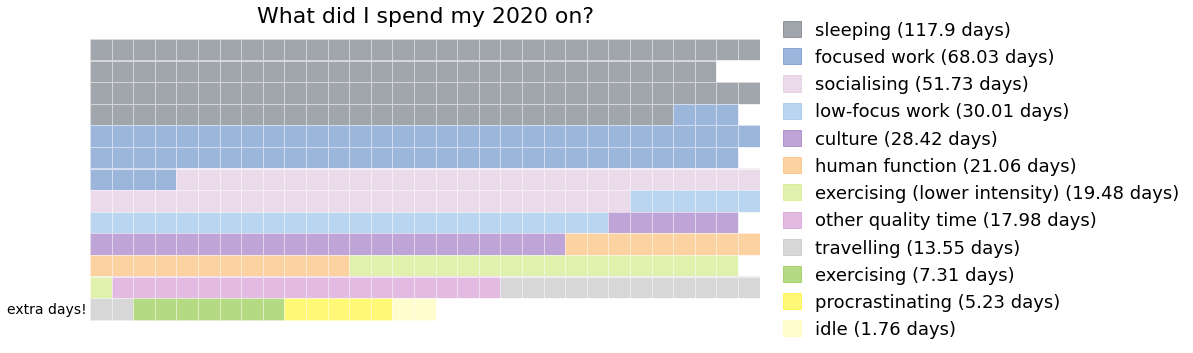

In [24]:
prop_calendar = pd.DataFrame(list_year, columns = ['activity'])

surplus = len(prop_calendar) - len(data)

months = list(data.month.values)
months.extend([13]*surplus)

days = list(data.day.values)
days.extend([i for i in range(1,surplus+1)])

prop_calendar['month'] = months
prop_calendar['day'] = days

#data = prop_calendar
values = 'activity'
title = 'What did I spend my 2020 on?'

#cmap = [ cm.Set3(x) for x in range(len(categories_broad))]
#cols = cmap

categorical = True

cats = yearly_summary.activity
cmap = [activities_colours[activity] for activity in cats]
cols = cmap

#labels = cmap = [activities_labels[activity] for activity in cats]

args = [cats, cats]

#cats_reg = [rf"^{country},.*" for country in countries]
months_extra = ('', '', '', '', '', '',  '', '', '', '', '', '', 'extra days!')

temp = prop_calendar.pivot(index = 'month', columns = 'day', values = values)
n = len(temp.index)

mask = pd.isnull(temp)
temp_num = temp.fillna(0)

if categorical == True:
    cats = args[0]
    for i, cat in enumerate(cats):
        temp_num = temp_num.replace(regex=rf"{cat}", value = i)

#plot heatmap - size will change depending on the number of months in data

#plt.figure(figsize = (1.3*12,1.3*n))
if categorical: fig = plt.figure(figsize = (1*12,1*n))
else: fig = plt.figure(figsize = (1.2*12,1.2*n))

if categorical: cbar_bool = False
else: cbar_bool = True

sns.heatmap(temp_num, mask=mask, 
            cbar = cbar_bool, cbar_kws={"shrink": 0.3, 'aspect':12, 'pad': 0.02},
            linewidth = 0.05, square = 1, 
            cmap = cols, alpha = 0.6)

#move day labels to the top and get rid of tick marks
ax = plt.gca()
plt.gca().xaxis.tick_top()
ax.get_xaxis().set_visible(False)
ax.tick_params(length = 0)

#get rid of axis labels as self-explanatory
#add title
plt.xlabel('', size = font_med)
plt.ylabel('', size = font_med)
plt.title(title, size = font_title)


bottom, top = ax.get_ylim()
#change numbers to month names on the heatmap
plt.yticks(np.arange(n)+0.5, months_extra[:n], 
           rotation=0, va="center", size = font_small)
#fix the weird bug which changes dimensions of first and last row
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_facecolor("white")
fig.set_facecolor('white')

#if data is categorical, fix the colorbar
if categorical:
    cat_names = args[1]

    legend_patches = [mpatches.Patch(color = activities_colours[name], 
                                     label = str(activities_labels[name] + ' (' + str(yearly_summary[yearly_summary.activity == name].days.values[0]) + ' days)'), 
                                     alpha = 0.6) for name in cat_names]
    lgd = plt.legend(handles=legend_patches, handlelength = 1, handleheight = 1,
              bbox_to_anchor=(1.01, 0.5), loc='center left', 
              framealpha = 0, prop={'size': font_med})

#plt.savefig('year_props.png')
plt.savefig('figs/year_props.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

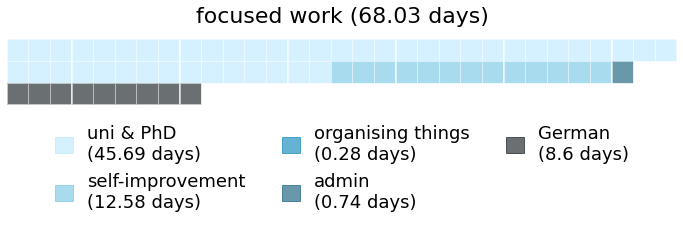

In [32]:
category = 'High_intensity_work'

list_cat = []

for subcat in subcategories[category]:
    i = yearly_summary_detail[yearly_summary_detail['activity'] == subcat].index[0]
    list_cat.extend([subcat]*round(yearly_summary_detail.days[i]))

prop_calendar_cat = pd.DataFrame(list_cat, columns = ['activity'])

surplus = 0
if (len(prop_calendar_cat) - len(data) > 0):
    surplus = len(prop_calendar) - len(data)

months = list(data.month.values[:len(list_cat)])
days = list(data.day.values[:len(list_cat)])

if (surplus!= 0):
    months.extend([13]*surplus)
    days.extend([i for i in range(1,surplus+1)])

prop_calendar_cat['month'] = months

prop_calendar_cat['day'] = days


values = 'activity'
title = activities_labels[category] + ' (' + str(yearly_summary[yearly_summary.activity == category].days.values[0]) + ' days)'

#cmap = [ cm.Set3(x) for x in range(len(categories_broad))]
#cols = cmap

categorical = True

cats = subcategories[category]
cmap = [activities_colours[activity] for activity in cats]
cols = cmap

#labels = cmap = [activities_labels[activity] for activity in cats]

args = [cats, cats]

#cats_reg = [rf"^{country},.*" for country in countries]
months_extra = ('', '', '', '', '', '',  '', '', '', '', '', '', 'extra days!')

temp = prop_calendar_cat.pivot(index = 'month', columns = 'day', values = values)
#n = len(temp.index)

mask = pd.isnull(temp)
temp_num = temp.fillna(0)

if categorical == True:
    cats = args[0]
    for i, cat in enumerate(cats):
        temp_num = temp_num.replace(regex=rf"{cat}", value = i)

#plot heatmap - size will change depending on the number of months in data

#plt.figure(figsize = (1.3*12,1.3*n))
if categorical: fig = plt.figure(figsize = (1*12,1*n))
#else: fig = plt.figure(figsize = (1.2*12,1.2*n))

if categorical: cbar_bool = False
else: cbar_bool = True

sns.heatmap(temp_num, mask=mask, 
            cbar = cbar_bool, cbar_kws={"shrink": 0.3, 'aspect':12, 'pad': 0.02},
            linewidth = 0.05, square = 1, 
            cmap = cols, alpha = 0.6)

#move day labels to the top and get rid of tick marks
ax = plt.gca()
plt.gca().xaxis.tick_top()
ax.get_xaxis().set_visible(False)
ax.tick_params(length = 0)

#get rid of axis labels as self-explanatory
#add title
plt.xlabel('', size = font_med)
plt.ylabel('', size = font_med)
plt.title(title, size = font_title)


bottom, top = ax.get_ylim()
#change numbers to month names on the heatmap
plt.yticks(np.arange(n)+0.5, months_extra[:n], 
           rotation=0, va="center", size = font_small)
#fix the weird bug which changes dimensions of first and last row
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_facecolor("white")
fig.set_facecolor('white')

#if data is categorical, fix the colorbar
if categorical:
    cat_names = args[1]

    legend_patches = [mpatches.Patch(color = activities_colours[name], 
                                     label = str(activities_labels[name] + '\n(' + str(yearly_summary_detail[yearly_summary_detail.activity == name].days.values[0]) + ' days)'), 
                                     alpha = 0.6) for name in cat_names]
    lgd = plt.legend(handles=legend_patches, handlelength = 1, handleheight = 1,
              ncol = 3, bbox_to_anchor=(0.5, -1.3), loc='lower center', 
              framealpha = 0, prop={'size': font_med})

#plt.savefig('year_props.png')
#fig..set_size_pixels(950, )

size = fig.get_size_inches()*fig.dpi 

plt.savefig('figs/' + category + '.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

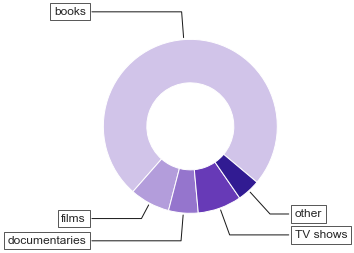

In [1077]:
subcats = []
proportions = []

for subcat in subcategories['Culture']:
        i = yearly_summary_detail[yearly_summary_detail['activity'] == subcat].index[0]
        subcats.append(activities_labels[subcat]) 
        proportions.append(yearly_summary_detail.total_hours[i])
        
cmap = [activities_colours[subcat] for subcat in subcategories['Culture']]

fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(proportions, wedgeprops=dict(width=0.5), startangle=-40, colors = cmap, normalize = True)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    #print(ang)
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    
    kw["arrowprops"].update({"connectionstyle": connectionstyle, 
                            'lw': 1, 
                            'color': 'k'})
    #print(x,y)
    
    ang_nb = (wedges[i-1].theta2 - wedges[i-1].theta1)/2. + wedges[i-1].theta1
    y_text = y
    if(ang - ang_nb < 30):
        y_text += np.sign(y)*0.1
    
    ax.annotate(subcats[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y_text),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Matplotlib bakery: A donut")

plt.show()

#### Proposrtions over time

In [36]:
month_hours = [activities[data.month == month].size*0.25 for month in range(1,13)]
month_hours = np.array(month_hours)

<ipython-input-40-40c2b9ef6f8a>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months_abb)


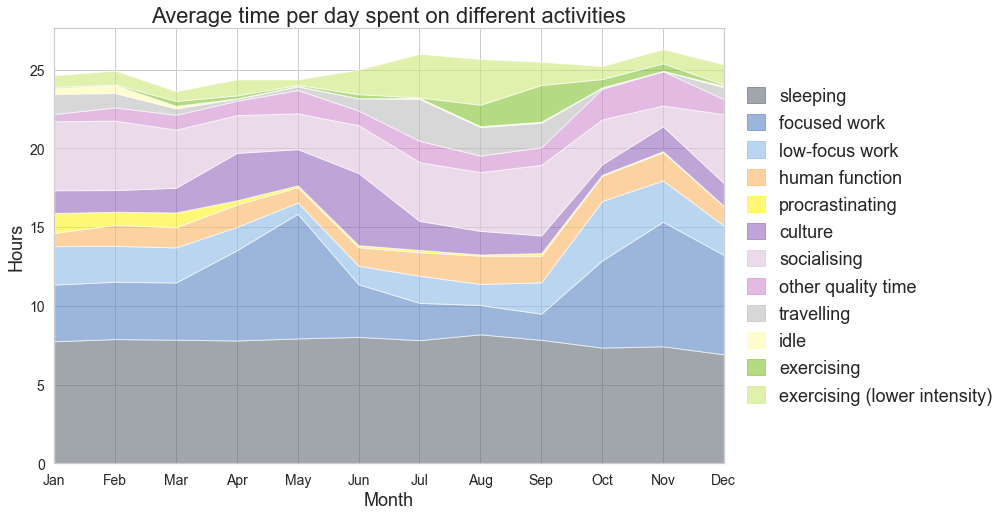

In [40]:
temp = summary_broad.groupby(data['month']).sum()

monthly_totals = summary_broad.groupby(data['month']).sum()

daily_averages_bymonth = np.round(monthly_totals.divide(month_hours, axis = 'rows')*24,2)

temp = daily_averages_bymonth

temp.columns

cats = temp.columns
cmap = [activities_colours[activity] for activity in cats]
cols = cmap

fig = plt.figure(figsize = (12,8))
sns.set(style="whitegrid")

plt.stackplot(temp.index.values, temp.values.T, 
              labels = cats, colors = cols, alpha = 0.6)

#plt.plot(range(1,13), month_hrs, '--')


#plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, prop={'size': 14})

legend_patches = [mpatches.Patch(color = activities_colours[name], label = activities_labels[name], alpha = 0.6) for name in cats]
lgd = plt.legend(handles=legend_patches, handlelength = 1, handleheight = 1,
              bbox_to_anchor=(1.01, 0.5), loc='center left', 
              ncol = 1, framealpha = 0, prop={'size': font_med})

plt.title('Average time per day spent on different activities', size = font_title, weight = 'ultralight')
plt.xlabel('Month', size = font_med)
plt.ylabel('Hours', size = font_med)

ax = plt.gca()

ax.set_facecolor("white")
fig.set_facecolor('white')
#date_fmt = dates.DateFormatter('%m')
#ax.xaxis.set_major_formatter(date_fmt)

ax.set_xticklabels(months_abb)
plt.xticks(np.arange(1,13), months_abb, size = font_small)
plt.yticks(size = font_small)

#ax.set_ylim([0,max(temp.sum(axis=1))])
ax.set_xlim([temp.index.values[0], temp.index.values[-1]])

plt.savefig('figs/hrs_per_month.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [37]:
monthly_totals = summary_detail.groupby(data['month']).sum()

daily_averages_bymonth = np.round(monthly_totals.divide(month_hours, axis = 'rows')*24,2)

daily_averages_bymonth.columns

Index(['sleep', 'WI-uni', 'WI-self-improvement', 'WI-organisation', 'WI-admin',
       'WI-German', 'WL-uni', 'WL-self-improvement', 'WL-organisation',
       'WL-admin', 'WL-German', 'Human_function', 'Procrastination',
       'Culture-books', 'Culture-films', 'Culture-documentaries', 'Culture-TV',
       'Socialising', 'Quality-blogs', 'Quality-podcasts', 'Quality-news',
       'Quality-games', 'Quality-YT', 'Quality-chill', 'Travel', 'Idle',
       'HI_exercise', 'LI_exercise', 'Culture-other', 'Quality-other'],
      dtype='object')

In [38]:
daily_averages_bymonth['WI-uni'] + daily_averages_bymonth['WL-uni'] 

month
1     2.56
2     3.11
3     3.85
4     5.96
5     7.96
6     0.99
7     0.00
8     0.03
9     0.84
10    5.11
11    6.39
12    3.52
dtype: float64

In [39]:
daily_averages_bymonth['WI-self-improvement'] + daily_averages_bymonth['WL-self-improvement']

month
1     2.32
2     1.42
3     0.92
4     0.45
5     0.18
6     1.20
7     0.48
8     0.74
9     0.31
10    1.21
11    2.15
12    3.71
dtype: float64